# **Evapotranspiration Estimation using <u>Penman-Monteith</u> Method**

## **Penman-Monteith Equation**

The Penman-Monteith equation is commonly used to estimate evapotranspiration rates
and is expressed as:

$$
\lambda ET =
\frac{
\Delta (R_n - G) + \rho_a C_p (e_s(T_a) - e_a) g_h
}{
\Delta + \gamma \left(\frac{g_h}{g_v}\right)
}........(1)
$$


**where:**

- **$\lambda ET$** is the latent heat flux $(\mathrm{J\,m^{-2}\,s^{-1}})$, with  
  $$
  \lambda = (2.501 - 0.00237\,T_a)\times10^6 \;\mathrm{J\,kg^{-1}}
  $$

- **$ET$** is the evapotranspiration rate $(\mathrm{mm\,s^{-1}})$

- **$\Delta$** is the slope of the saturation vapor pressure curve  
  $(\mathrm{kPa\,^\circ C^{-1}})$  
  $$
  \Delta = 4098
  \frac{
  0.6108 \exp\left(\frac{17.27\,T_a}{T_a + 237.3}\right)
  }{
  (T_a + 237.3)^2
  }
  $$

- **$R_n$** is the net radiation $(\mathrm{J\,m^{-2}\,s^{-1}})$

- **$G$** is the soil heat flux $(\mathrm{J\,m^{-2}\,s^{-1}})$

- **$\gamma$** is the psychrometric constant $(\mathrm{kPa\,^\circ C^{-1}})$  
  $$
  \gamma = 0.000665\,P_a
  $$

- **$T_a$** is air temperature $(^\circ\mathrm{C})$

- **Saturation vapor pressure**  
  $$
  e_s(T_a) = 0.6108 \exp\left(\frac{17.27\,T_a}{T_a + 237.3}\right)
  $$
  *(Clausius-Clapeyron equation)*

- **$e_a$** is actual vapor pressure (kPa)

- **Air density**  $(\mathrm{kg\,m^{-3}})$
  $$
  \rho_a =
  1.293
  \frac{273.15}{T_a + 273.15}
  \frac{P_a}{101.325}
  \left(1 - 0.378 \frac{e_a}{P_a}\right)
  $$

- **Specific heat of air**  $(\mathrm{J\,kg^{-1}\,^\circ\mathrm{C}^{-1}})$
  $$
  C_p =
  0.24 \cdot 4185.5
  \left(1 + 0.8 \frac{0.622 e_a}{P_a - e_a}\right)
  $$

- **$g_h$** is the air conductance to the heat transfer $(\mathrm{m\,s^{-1}})$

- **$g_v$**  is the bulk surface conductance to the vapor transfer $(\mathrm{m\,s^{-1}})$

## **Calculation of $g_h$**

The aerodynamic conductance to heat transfer is calculated as:

$$
g_h =
0.41^{2} \cdot U \cdot
\left[
\ln\left(\frac{Z_m - d_0}{Z_{0m}}\right)
- \psi_m(\zeta)
\right]^{-1}
\cdot
\left[
\ln\left(\frac{Z_h - d_0}{Z_{0h}}\right)
- \psi_h(\zeta)
\right]^{-1}
........(2)
$$

**where:**

- **U** is the wind speed at height $Z_m$ $(\mathrm{m\,s^{-1}})$

- **$Z_m$** is the height of wind measurements $(\mathrm{m})$

- **$Z_h$** is the height of humidity measurements $(\mathrm{m})$

- **$d_0$** is the zero displacement height $(\mathrm{m})$, with  $d_0 = \frac{2}{3}\,h_c$

- **$h_c$** is the canopy height $(\mathrm{m})$

- **$Z_{0m}$** is the roughness length governing momentum transfer $(\mathrm{m})$, with  $Z_{0m} = 0.1\,h_c$

- **$Z_{0h}$** is the roughness length governing heat and vapor transfer $(\mathrm{m})$, with $Z_{0h} = 0.01\,h_c$

- **$\psi_m(\zeta)$** and **$\psi_h(\zeta)$** are the stability correction factors for momentum and heat transfer, respectively (see the next section for their calculation).

**Note:**  For a well-watered reference surface, sensible heat exchange is small; therefore, stability corrections are often not required.


## **Calculation of stability correction factors, i.e., $\psi_h(\zeta)$ and $\psi_m(\zeta)$**

For now, let us assume that the bulk surface conductance to vapor transfer ($g_v$) is known  (the calculation of $g_v$ under different settings will be explained in the next section).

**Iterative procedure:**

- **Step 1:**  
  Assuming $\psi_h(\zeta) = 0$ and $\psi_m(\zeta) = 0$, calculate $g_h$ from Equation (2)  and then compute $\lambda ET$ from Equation (1), given all other input variables.

- **Step 2:**  
  Calculate the sensible heat flux:  
  $$
  H = R_n - G - \lambda ET
  $$

- **Step 3:**  
  Calculate the Monin-Obukhov length:
  $$
  L =
  -\frac{
  u_*^3 \cdot \theta_v \cdot \rho_a \cdot C_p
  }{
  0.41 \cdot g \cdot H
  }
  $$

  **where:**

  - **$u_*$** is the friction velocity $(\mathrm{m\,s^{-1}})$

  - **$\theta_v$** is the virtual potential temperature $(^\circ\mathrm{C})$, with  
    $$
    \theta_v = T_a \cdot (1 + 0.61\cdot q)
    $$

  - **$q$** is the specific humidity $(\mathrm{kg\,kg^{-1}})$, with  
    $$
    q = \frac{0.622 \cdot e_a}{P_a - 0.378 \cdot e_a}
    $$

  - **$g$** is the gravitational acceleration,  
    $$
    g = 9.81 \;\mathrm{m\,s^{-2}}
    $$

  - **$H$** is the sensible heat flux $(\mathrm{J\,m^{-2}\,s^{-1}})$

- **Step 4:**  
  Calculate the stability parameter:
  $$
  \zeta = \frac{z_m - d_0}{L}
  $$

- **Step 5:**  

  For **unstable conditions** $(\zeta < 0)$:
  $$
  \psi_m(\zeta) =
  2\ln\left(\frac{1+x}{2}\right)
  + \ln\left(\frac{1+x^2}{2}\right)
  - 2\tan^{-1}(x)
  + \frac{\pi}{2}
  $$

  $$
  \psi_h(\zeta) =
  2\ln\left(\frac{1+x^2}{2}\right)
  $$

  with  
  $$
  x = (1 - 16\zeta)^{1/4}
  $$

  For **stable conditions** $(\zeta \ge 0)$:
  $$
  \psi_m(\zeta) = \psi_h(\zeta) = -5\zeta
  $$

- **Step 6:**  
  Calculate the updated air conductance to heat transfer ($g_h$) using the new  
  values of $\psi_m(\zeta)$ and $\psi_h(\zeta)$ in Equation (2).

- **Step 7:**  
  Update $\lambda ET$ using the updated values of $g_h$ and $g_v$ in Equation (1).

- **Step 8:**  
  Repeat Steps 1-7 until $\lambda ET$ converges.


## **Let's understand this with DATA**

![Fluxtowers.jpg](https://github.com/praghav444/CEE491-591-Process-Hydrology-Tutorials/blob/main/Fluxtowers.jpg?raw=1)

In [10]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import warnings
warnings.filterwarnings('ignore')
#------------------------------------------------------------------------------------
# Site: AT-Neu (Managed grassland in Austria which is harvested 3-4 times per year)
Z_m = 3  # Measurement height (m)
h_c = 1  # Mean Canopy height (m)
#------------------------------------------------------------------------------------

In [11]:
print(Z_m)

3


# **Let's Download Sample Input Data files from Google Drive**

In [20]:
import os
from google.colab import drive
import subprocess

data_dir = "Sample_Input_Data_CE_491"
file_name = "Sample_data.csv"
os.makedirs(data_dir, exist_ok=True)

drive_url = "https://drive.google.com/file/d/1DcuLgLEi7wWdwC57Sw1JQX2QVRme17TE/view?usp=sharing"
folder_id = "1DcuLgLEi7wWdwC57Sw1JQX2QVRme17TE"
#!gdown --folder https://drive.google.com/drive/folders/{folder_id} -O {data_dir} # When downlaoding a directory
!gdown https://drive.google.com/uc?id={folder_id} -O {data_dir}/{file_name}    # Single File
print(f"Data downloaded to: {os.path.abspath(data_dir)}")

Downloading...
From: https://drive.google.com/uc?id=1DcuLgLEi7wWdwC57Sw1JQX2QVRme17TE
To: /content/Sample_Input_Data_CE_491/Sample_data.csv
100% 79.0k/79.0k [00:00<00:00, 76.3MB/s]
Data downloaded to: /content/Sample_Input_Data_CE_491


In [21]:
data = pd.read_csv(os.path.join(data_dir,"Sample_data.csv"))
data['DateTime'] = pd.to_datetime(data['DateTime'], format="%Y-%m-%d")
data = data.set_index(data['DateTime'])
data = data.drop(columns=['DateTime'])

In [22]:
data

,TA,SRad,WS,RH,LAI,Rn,G,USTAR,LE,H,PA,SM
DateTime,,,,,,,,,,,,
2008-01-01,-6.885813,29.115333,0.406263,89.568896,0.153497,36.442809,-4.172205,0.091087,0.485260,-12.811451,91.210417,6.409125
2008-01-02,-13.370812,23.845208,1.037593,87.142104,0.151604,7.750595,-9.548382,0.123294,3.304649,-22.162262,90.802083,5.974167
2008-01-03,-5.180250,37.242542,0.554750,70.681687,0.150235,9.283185,-3.402705,0.191238,1.014718,-19.530333,90.166667,5.925500
2008-01-04,2.784187,39.111583,1.966085,59.583188,0.149384,20.728000,-1.095249,0.407004,14.614374,-51.287521,90.438298,6.306063
2008-01-05,4.502417,27.021333,2.416340,58.740667,0.149043,32.137463,0.525646,0.369172,20.686758,-68.658485,90.427660,6.649396
...,...,...,...,...,...,...,...,...,...,...,...,...
2008-12-27,-10.734667,22.843271,0.579080,91.791375,0.016969,4.686630,-7.316330,0.103959,-0.739152,-15.967818,91.510000,33.721208
2008-12-28,-11.489625,17.548979,0.485714,90.833854,0.022531,NaN,-7.204160,0.298169,-0.649114,-22.580007,91.162292,32.636292
2008-12-29,-7.444375,21.372917,0.332075,96.922708,0.028358,2.362110,-6.909879,0.323308,-2.675653,-23.500146,91.371875,32.248021


In [23]:
temp = data
temp = temp.dropna()

In [24]:
temp

,TA,SRad,WS,RH,LAI,Rn,G,USTAR,LE,H,PA,SM
DateTime,,,,,,,,,,,,
2008-01-01,-6.885813,29.115333,0.406263,89.568896,0.153497,36.442809,-4.172205,0.091087,0.485260,-12.811451,91.210417,6.409125
2008-01-02,-13.370812,23.845208,1.037593,87.142104,0.151604,7.750595,-9.548382,0.123294,3.304649,-22.162262,90.802083,5.974167
2008-01-03,-5.180250,37.242542,0.554750,70.681687,0.150235,9.283185,-3.402705,0.191238,1.014718,-19.530333,90.166667,5.925500
2008-01-04,2.784187,39.111583,1.966085,59.583188,0.149384,20.728000,-1.095249,0.407004,14.614374,-51.287521,90.438298,6.306063
2008-01-05,4.502417,27.021333,2.416340,58.740667,0.149043,32.137463,0.525646,0.369172,20.686758,-68.658485,90.427660,6.649396
...,...,...,...,...,...,...,...,...,...,...,...,...
2008-12-25,-0.142854,30.748854,1.084396,93.568479,0.006892,23.672050,-5.290048,0.142112,-1.603133,-7.643100,91.127292,34.804188
2008-12-26,-9.665021,19.027562,0.624615,93.375208,0.011734,12.675115,-6.877459,0.224632,-1.142735,-28.230511,91.605000,34.445458
2008-12-27,-10.734667,22.843271,0.579080,91.791375,0.016969,4.686630,-7.316330,0.103959,-0.739152,-15.967818,91.510000,33.721208


#### **Visualize the data**

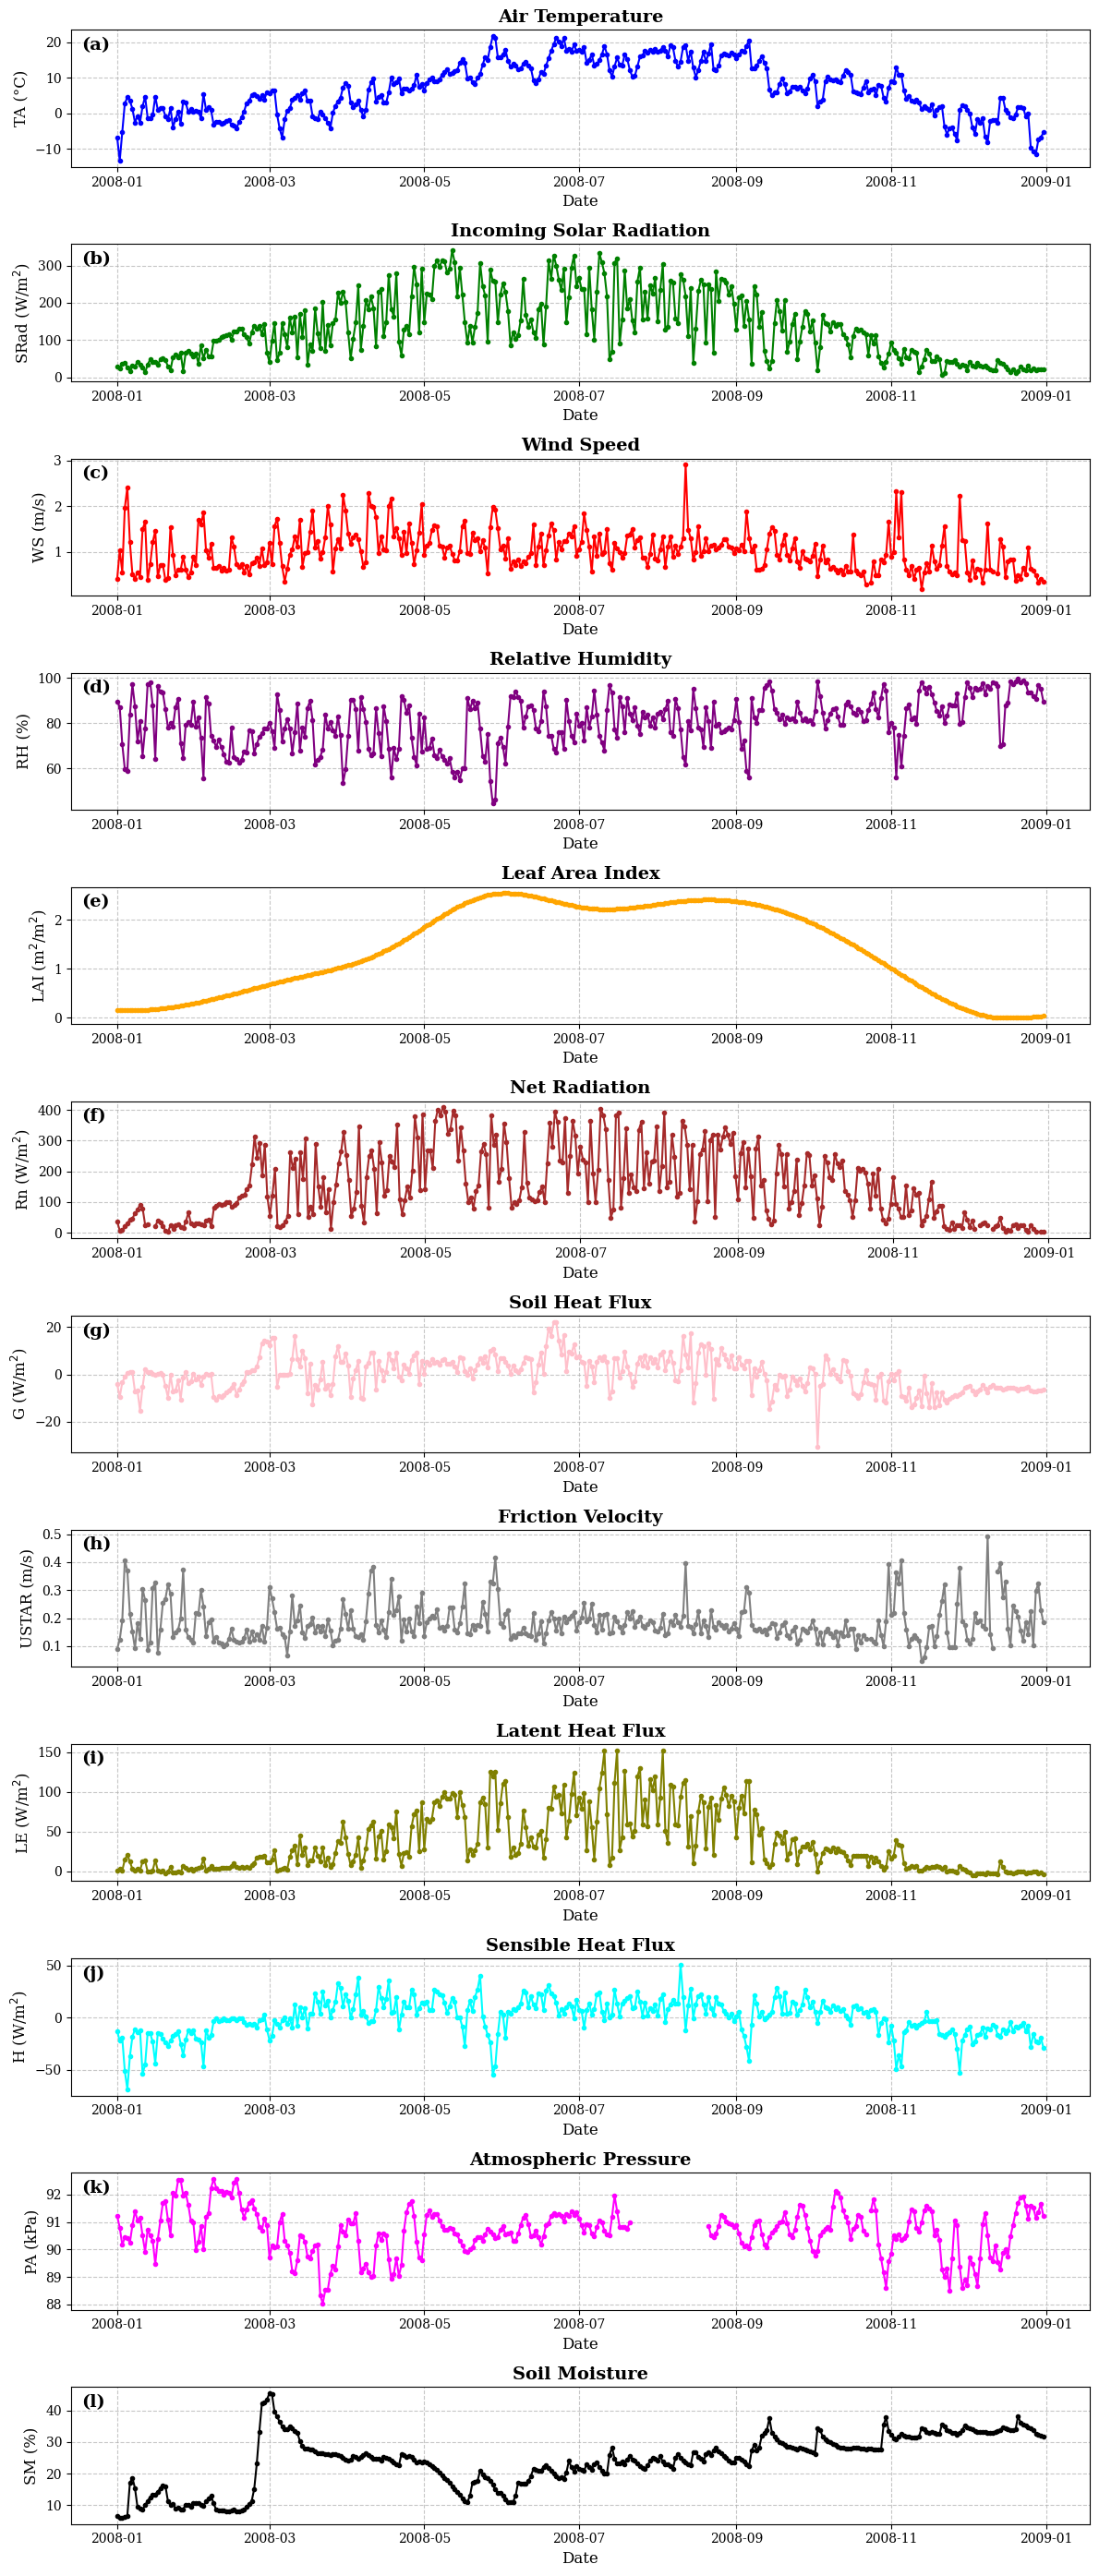

In [33]:
import matplotlib.pyplot as plt
plt.rcParams['font.family'] = 'serif'
import string

meta_data = {
    'TA': {'name': 'Air Temperature', 'unit': '(°C)'},
    'SRad': {'name': 'Incoming Solar Radiation', 'unit': '(W/m$^2$)'},
    'WS': {'name': 'Wind Speed', 'unit': '(m/s)'},
    'RH': {'name': 'Relative Humidity', 'unit': '(%)'},
    'LAI': {'name': 'Leaf Area Index', 'unit': '(m$^2$/m$^2$)'},
    'Rn': {'name': 'Net Radiation', 'unit': '(W/m$^2$)'},
    'G': {'name': 'Soil Heat Flux', 'unit': '(W/m$^2$)'},
    'USTAR': {'name': 'Friction Velocity', 'unit': '(m/s)'},
    'LE': {'name': 'Latent Heat Flux', 'unit': '(W/m$^2$)'},
    'H': {'name': 'Sensible Heat Flux', 'unit': '(W/m$^2$)'},
    'PA': {'name': 'Atmospheric Pressure', 'unit': '(kPa)'},
    'SM': {'name': 'Soil Moisture', 'unit': '(%)'}
}

colors = ['blue', 'green', 'red', 'purple', 'orange', 'brown', 'pink', 'gray', 'olive', 'cyan', 'magenta', 'black', 'yellow', 'teal']

plt.figure(figsize=(12, 28))

for i, column in enumerate(data.columns, 1):
    ax = plt.subplot(len(data.columns), 1, i)
    plt.plot(data.index, data[column], color=colors[i-1], linestyle='-', marker='o', markersize=3)

    panel_label = string.ascii_lowercase[i-1]
    plt.text(0.01, 0.95, f'({panel_label})', transform=ax.transAxes,
             fontsize=14, fontweight='bold', va='top')

    info = meta_data.get(column, {'name': column, 'unit': ''})

    plt.xlabel('Date', fontsize=12)
    plt.ylabel(f'{column} {info["unit"]}', fontsize=12)

    plt.title(f'{info["name"]}', fontsize=14, fontweight='bold')

    plt.xticks(fontsize=10)
    plt.yticks(fontsize=10)
    plt.grid(True, linestyle='--', alpha=0.7)

plt.tight_layout()
plt.show()

#### **Check Energy Balance**

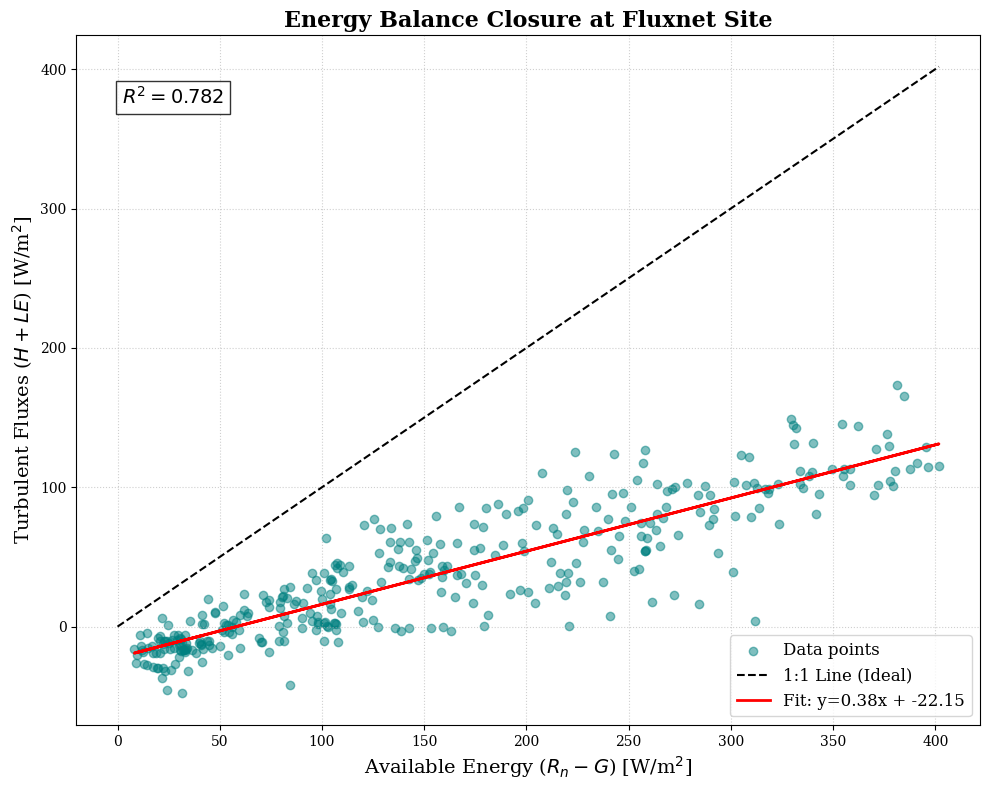

In [38]:
from sklearn.linear_model import LinearRegression
Rn = data['Rn'].values
G = data['G'].values
H = data['H'].values
LE = data['LE'].values

available_energy = Rn - G
turbulent_fluxes = H + LE

mask = ~np.isnan(available_energy) & ~np.isnan(turbulent_fluxes)
x = available_energy[mask].reshape(-1, 1)
y = turbulent_fluxes[mask]

model = LinearRegression().fit(x, y)
y_pred = model.predict(x)
r_squared = model.score(x, y)
slope = model.coef_[0]
intercept = model.intercept_

plt.figure(figsize=(10, 8))
plt.scatter(available_energy, turbulent_fluxes, alpha=0.5, color='teal', label='Data points')

limit = max(np.nanmax(available_energy), np.nanmax(turbulent_fluxes))
plt.plot([0, limit], [0, limit], color='black', linestyle='--', label='1:1 Line (Ideal)')

plt.plot(x, y_pred, color='red', linewidth=2, label=f'Fit: y={slope:.2f}x + {intercept:.2f}')

plt.title('Energy Balance Closure at Fluxnet Site', fontsize=16, fontweight='bold')
plt.xlabel(r'Available Energy ($R_n - G$) [W/m$^2$]', fontsize=14)
plt.ylabel(r'Turbulent Fluxes ($H + LE$) [W/m$^2$]', fontsize=14)
plt.text(0.05, 0.9, f'$R^2 = {r_squared:.3f}$', transform=plt.gca().transAxes, fontsize=14, bbox=dict(facecolor='white', alpha=0.8))
plt.legend(fontsize=12)
plt.grid(True, linestyle=':', alpha=0.6)

plt.tight_layout()
plt.show()

In [39]:
# Let' calculate basic meteorological variables
Ta = data['TA'].values  # Air temperature (degC)
RH = data['RH'].values  # Relative Humidity (%)
Pa = data['PA'].values  # Near surface atmospheric pressure (kPa)
#-------------------------------------------------------------------------------------------------------------------------
delta = 4098*(0.6108*np.exp(17.27*Ta/(Ta+237.3)))/((Ta+237.3)**2) # slope of the saturated wapor-temperature curve (kPa K-1)
#-------------------------------------------------------------------------------------------------------------------------
es = 0.6108*np.exp(17.27*Ta/(Ta + 237.3))  # Saturated air vapor pressure (kPa)
ea = es*RH/100   # Actual air vapor pressure (kPa); Note: RH = ea/es
rho_air = 1.293*(273.15/(Ta+273.15))*(Pa/101.325)*(1-0.378*(ea/Pa)) # Air density  (kg m-3)
#-------------------------------------------------------------------------------------------------------------------------
psyc_const = 0.000665*Pa # Psychrometric constant (kPa K-1)
#-------------------------------------------------------------------------------------------------------------------------
Cp = 0.24 * 4185.5 * (1 + 0.8 * (0.622 * ea / (Pa - ea))) # Specific heat capacity of air (J kg-1 C-1)
#-------------------------------------------------------------------------------------------------------------------------

## **Case 1: Open water (g<sub>h</sub> = g<sub>v</sub>)**
![Standard-Class-A-evaporation-pan-at-Tharandt-Met-Station-Photo-source-IHM-TU-Dresden.png](https://github.com/praghav444/CEE491-591-Process-Hydrology-Tutorials/blob/main/Standard-Class-A-evaporation-pan-at-Tharandt-Met-Station-Photo-source-IHM-TU-Dresden.png?raw=1)
$$
\lambda ET = \frac{\Delta \cdot (R_n - G) + \rho_{a} \cdot C_{p} \cdot (e_s(T_{a}) - e_a) \cdot g_{h}}{\Delta + \gamma \cdot g_h/g_v} = \frac{\Delta \cdot (R_n - G) + \rho_{a} \cdot C_{p} \cdot (e_s(T_{a}) - e_a) \cdot g_{h}}{\Delta + \gamma}
$$
No stability corrections required because of small heat exchanges.
$$ g_{h}=\frac{U_{2}}{208}$$
Note: $$1/g_v = 1/g_h + 1/g_{s}$$


In [55]:
Rn = data['Rn'].values
G = data['G'].values
U = data['WS'].values
U2 = U*4.87/(np.log(67.8*Z_m-5.42))  # Based on lagarithmic profile of wind

In [56]:
gh = U2/208

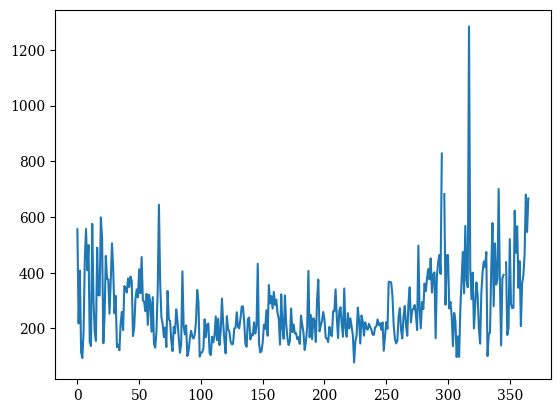

In [57]:
plt.plot(1/gh)

In [58]:
lambda_ET_case1 = (delta*(Rn-G) + rho_air*Cp*(es-ea)*gh)/(delta + psyc_const)

In [59]:
lambda_ET_obs = data['LE'].values

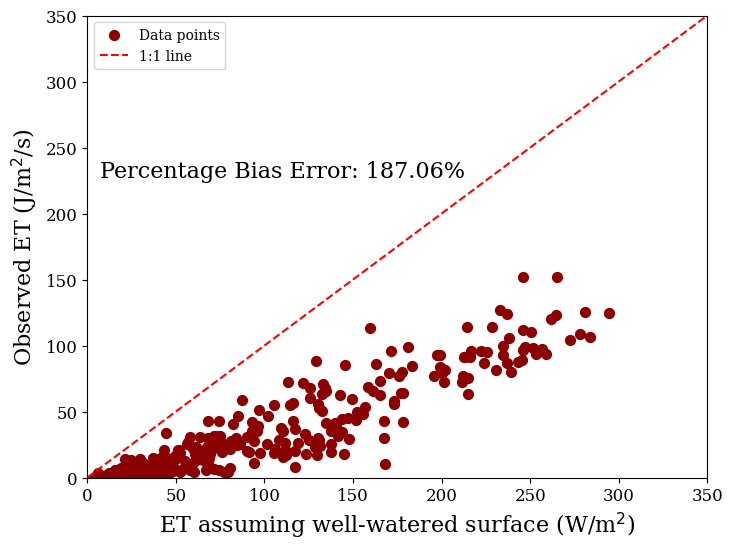

In [60]:
#pip install scikit-learn
from sklearn.metrics import r2_score
import matplotlib.pyplot as plt
plt.figure(figsize=(8,6))
plt.scatter(lambda_ET_case1, lambda_ET_obs, marker='o', s=50, color='darkred', label='Data points')
plt.plot([0, 350], [0, 350], color='red', linestyle='--', label='1:1 line')
plt.xlabel(r"ET assuming well-watered surface (W/m$^2$)", fontsize=16)
plt.ylabel("Observed ET (J/m$^2$/s)", fontsize=16)
plt.xlim(0, 350)
plt.ylim(0, 350)
plt.xticks(size=12)
plt.yticks(size=12)
valid_indices = ~np.isnan(lambda_ET_obs) & ~np.isnan(lambda_ET_case1)
lambda_ET_obs_valid= lambda_ET_obs[valid_indices]
lambda_ET_case1_valid = lambda_ET_case1[valid_indices]
bias_error = 100 * (np.sum(lambda_ET_case1_valid - lambda_ET_obs_valid) / np.sum(lambda_ET_obs_valid))
plt.text(0.02, 0.65, f"Percentage Bias Error: {bias_error:.2f}%", fontsize=16, transform=plt.gca().transAxes)
plt.legend()
plt.show()

## **Case 2: Partially wet soil with no vegetation**
![Fig2.PNG](https://github.com/praghav444/CEE491-591-Process-Hydrology-Tutorials/blob/main/Fig2.PNG?raw=1)
$$
\lambda ET = = \frac{\Delta \cdot (R_n - G) + \rho_{a} \cdot C_{p} \cdot (e_s(T_{a}) - e_a) \cdot g_{h}}{\Delta + \gamma \cdot g_h/g_v)} =\frac{\Delta \cdot (R_n - G) + \rho_{a} \cdot C_{p} \cdot (e_s(T_{a}) - e_a) \cdot g_{h}}{\Delta + \gamma \cdot (1+g_h/g_{soil})} <----------> 1/g_v = 1/g_h + 1/g_{soil}
$$
$$ g_{h}=\frac{U_{2}}{208}$$
$$ g_{soil}=\frac{1}{exp(8.206-4.25 \cdot \theta / \theta_s)}$$


In [61]:
theta_s = 0.4
theta = data['SM']/100
gsoil = 1/(np.exp(8.206-4.25*theta/theta_s))   # Soil conductance (m/s)

In [62]:
lambda_ET_case2 = (delta*(Rn-G) + rho_air*Cp*(es-ea)*gh)/(delta + psyc_const*(1+gh/gsoil))

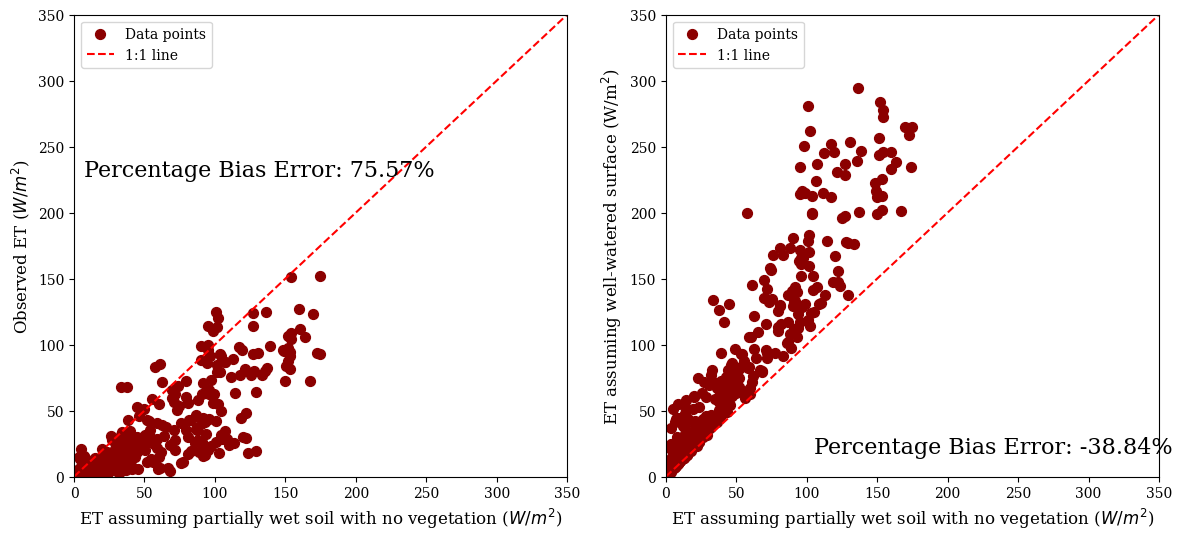

In [63]:
fig, ax = plt.subplots(1, 2, figsize=(14, 6))
ax[0].scatter(lambda_ET_case2, lambda_ET_obs, marker='o', s=50, color='darkred', label='Data points')
ax[0].set_xlabel(r"ET assuming partially wet soil with no vegetation ($W/m^2$)", fontsize=12)
ax[0].set_ylabel(r"Observed ET ($W/m^2$)", fontsize=12)
ax[0].plot([0, 350], [0, 350], color='red', linestyle='--', label='1:1 line')
ax[0].set_xlim(0, 350)
ax[0].set_ylim(0, 350)
valid_indices = ~np.isnan(lambda_ET_obs) & ~np.isnan(lambda_ET_case2)
lambda_ET_obs_valid= lambda_ET_obs[valid_indices]
lambda_ET_case2_valid = lambda_ET_case2[valid_indices]
bias_error = 100 * (np.sum(lambda_ET_case2_valid - lambda_ET_obs_valid) / np.sum(lambda_ET_obs_valid))
ax[0].text(0.02, 0.65, f"Percentage Bias Error: {bias_error:.2f}%", fontsize=16, transform=ax[0].transAxes)
ax[0].legend()

ax[1].scatter(lambda_ET_case2, lambda_ET_case1, marker='o', s=50, color='darkred', label='Data points')
ax[1].set_xlabel(r"ET assuming partially wet soil with no vegetation ($W/m^2$)", fontsize=12)
ax[1].set_ylabel(r"ET assuming well-watered surface (W/m$^2$)", fontsize=12)
ax[1].plot([0, 350], [0, 350], color='red', linestyle='--', label='1:1 line')
ax[1].set_xlim(0, 350)
ax[1].set_ylim(0, 350)
valid_indices = ~np.isnan(lambda_ET_case1) & ~np.isnan(lambda_ET_case2)
lambda_ET_case1_valid= lambda_ET_case1[valid_indices]
bias_error = 100 * (np.sum(lambda_ET_case2_valid - lambda_ET_case1_valid) / np.sum(lambda_ET_case1_valid))
ax[1].text(0.3, 0.05, f"Percentage Bias Error: {bias_error:.2f}%", fontsize=16, transform=ax[1].transAxes)
ax[1].legend()
plt.show()

## **Case 3: Soil fully covered with vegetation**
![temp.PNG](https://github.com/praghav444/CEE491-591-Process-Hydrology-Tutorials/blob/main/temp.PNG?raw=1)

$$
\lambda ET = \frac{\Delta \cdot (R_n - G) + \rho_{a} \cdot C_{p} \cdot (e_s(T_{a}) - e_a) \cdot g_{h}}{\Delta + \gamma \cdot (1+\frac{g_h}{g_{veg}})}
$$

$$
g_{h} = 0.41^{2} \cdot U \cdot \left[\ln\left(\frac{Z_m-d_0}{Z_{0m}}\right)-\psi_m(\zeta)\right]^{-1} \cdot \left[\ln\left(\frac{Z_h-d_0}{Z_{0h}}\right)-\psi_h(\zeta)\right]^{-1}
$$

$$g_{veg} = gc_{star} \cdot (1-m \cdot log(VPD))\cdot F_1 \cdot F_2$$
with $$gc_{star}  = gc_{ref} \cdot \left(\frac{\theta - \theta_w}{\theta_s - \theta_w}\right) \cdot LAI$$
$$F_1 = 1-exp(-\alpha \cdot SRad/100)$$
$$F_2 = 1-0.0016 \cdot (25-Ta)^2$$

In [64]:
d0 = 2/3*h_c
Z0m = 0.1*h_c
Z0h = 0.01*h_c

In [65]:
gh = 0.41**2 * U * (np.log((Z_m-d0)/Z0m))**(-1) * (np.log((Z_m-d0)/Z0h))**(-1)  # No stability corrections for now

In [66]:
VPD = es-ea
SRad = data['SRad'].values
LAI = data['LAI'].values

In [67]:
# Parameters
theta_w = 0.07
gc_ref = 0.5*8.314*(Ta+273.15)/(Pa*1e3) # mmol H2O m-2 s-1 to m s-1 (Ideal gas law: PV=nRT)
m = 0.4
alpha = 0.1

In [68]:
F1 = 1 - np.exp(-alpha * SRad / 100)
F2 = 1 - 0.0016 * (25 - Ta) ** 2
gc_star = gc_ref * (theta - theta_w) / (theta_s - theta_w) * LAI
gveg = gc_star * (1 - m * np.log(VPD)) * F1 * F2
lambda_ET_case3 = (delta * (Rn - G) + rho_air * Cp * (es - ea) * gh) / (delta + psyc_const * (1 + gh / gveg))

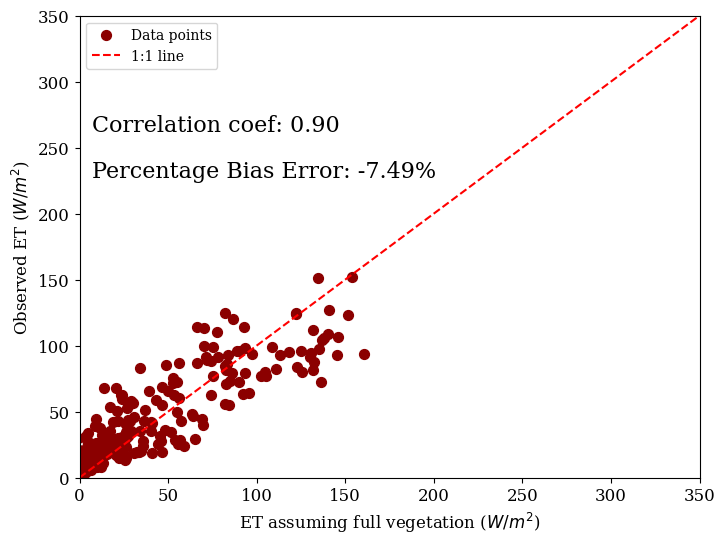

In [69]:
plt.figure(figsize=(8,6))
plt.scatter(lambda_ET_case3, lambda_ET_obs, marker='o', s=50, color='darkred', label='Data points')
plt.plot([0, 350], [0, 350], color='red', linestyle='--', label='1:1 line')
plt.xlabel(r"ET assuming full vegetation ($W/m^2$)", fontsize=12)
plt.ylabel(r"Observed ET ($W/m^2$)", fontsize=12)
plt.xlim(0, 350)
plt.ylim(0, 350)
plt.xticks(size=12)
plt.yticks(size=12)
valid_indices = ~np.isnan(lambda_ET_obs) & ~np.isnan(lambda_ET_case3)
lambda_ET_obs_valid= lambda_ET_obs[valid_indices]
lambda_ET_case3_valid = lambda_ET_case3[valid_indices]
corr = np.corrcoef(lambda_ET_obs_valid, lambda_ET_case3_valid)[0, 1]
bias_error = 100 * (np.sum(lambda_ET_case3_valid - lambda_ET_obs_valid) / np.sum(lambda_ET_obs_valid))
plt.text(0.02, 0.75, f"Correlation coef: {corr:.2f}", fontsize=16, transform=plt.gca().transAxes)
plt.text(0.02, 0.65, f"Percentage Bias Error: {bias_error:.2f}%", fontsize=16, transform=plt.gca().transAxes)
plt.legend()
plt.show()

#### **Using MOST to apply stability corrections**

In [70]:
USTAR = data['USTAR']
LE_pred = []
for i in range(len(Ta)):
    count = 0
    gh = 0.41**2 * U[i] * (np.log((Z_m-d0)/Z0m))**-1 * (np.log((Z_m-d0)/Z0h))**-1
    lambda_ET_i_0 = (delta[i]*(Rn[i]-G[i]) + rho_air[i]*Cp[i]*(es[i] - ea[i])*gh)/(delta[i] + psyc_const[i]*(1 + gh / gveg[i]))
    thr = 100
    count = 0
    while thr > 2:
        if count > 1000:
            break
        H = Rn[i] - G[i] - lambda_ET_i_0   # Sensible Heat Flux
        L =  -rho_air[i] * Cp[i] * (Ta[i]+273.15) * (USTAR[i] ** 3) / (0.41 * 9.81 * H)  # Monin-Obukhuv Length
        zeta = (Z_m - d0) / L
        if zeta > 1:
            zeta = 1
        if zeta < -1.5:
            zeta = -1.5
        if zeta < 0:
            x = (1 - 16*zeta)**(1/4)
            phi_m = 2*np.log((1+x)/2) + np.log((1+x**2)/2) - 2*np.arctan(x) + np.pi/4
            phi_h = 2*np.log((1+x**2)/2)
        else:
            phi_m = -5*zeta
            phi_h = phi_m

        gh = 0.41**2 * U[i] * (np.log((Z_m-d0)/Z0m)-phi_m)**-1 * (np.log((Z_m-d0)/Z0h)-phi_h)**-1
        lambda_ET_i = (delta[i]*(Rn[i]-G[i]) + rho_air[i]*Cp[i]*(es[i] - ea[i])*gh)/(delta[i] + psyc_const[i]*(1 + gh / gveg[i]))
        thr = abs(lambda_ET_i - lambda_ET_i_0)
        lambda_ET_i_0 = lambda_ET_i
        count += 1
    LE_pred.append(lambda_ET_i)
LE_pred = np.array(LE_pred)

In [71]:
LE_pred

array([ 4.27769453e-03,  4.37509866e-03,  7.02094651e-03, -3.31961919e-03,
       -2.05215476e-03,  2.48606602e-02,  3.20390113e-02, -4.20711074e-02,
       -6.75514888e-03, -1.36701162e-02,  5.45700543e-03,  7.08328811e-03,
       -7.42965023e-03,             nan,             nan,  6.87940735e-02,
        1.23686799e-02,  3.33768801e-02,  2.92378325e-02, -1.77807602e-02,
       -1.15124767e-02,  3.65564310e-03, -2.74703372e-02, -1.28831972e-02,
        2.81035472e-03, -2.21902534e-02,  7.49757036e-03,  6.28945093e-02,
        1.04997691e-02,  1.74847965e-02,  5.81780973e-03,  1.77127156e-02,
        4.51377815e-03, -2.71630304e-02,  8.69151036e-02,  2.25206112e-02,
        5.19077342e-02,  2.48234779e-02, -1.52588924e-01, -6.20031613e-02,
       -5.22061430e-02, -6.97280406e-02, -5.97422756e-02, -5.65354638e-02,
       -5.43399324e-02, -5.14769728e-02, -8.45382060e-02, -9.59498480e-02,
       -7.48960396e-02, -4.31872034e-02,  2.49938542e-02,  2.63069681e-01,
        4.66039937e-01,  

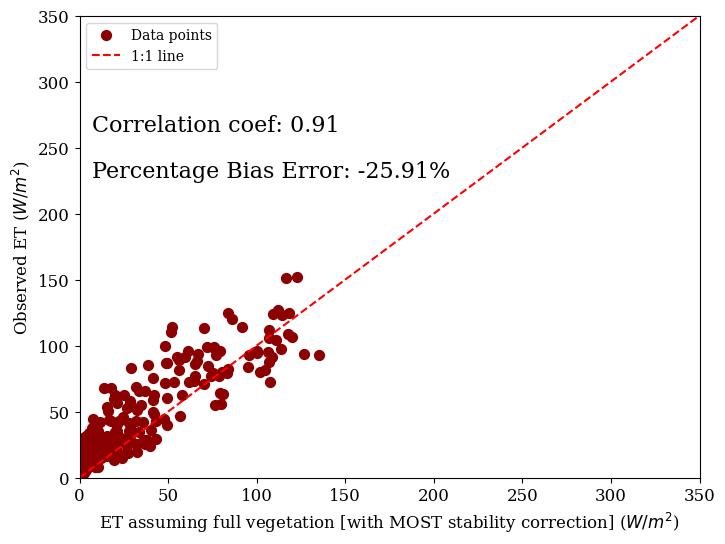

In [72]:
plt.figure(figsize=(8,6))
plt.scatter(LE_pred, lambda_ET_obs, marker='o', s=50, color='darkred', label='Data points')
plt.plot([0, 350], [0, 350], color='red', linestyle='--', label='1:1 line')
plt.xlabel(r"ET assuming full vegetation [with MOST stability correction] ($W/m^2$)", fontsize=12)
plt.ylabel(r"Observed ET ($W/m^2$)", fontsize=12)
plt.xlim(0, 350)
plt.ylim(0, 350)
plt.xticks(size=12)
plt.yticks(size=12)
valid_indices = ~np.isnan(lambda_ET_obs) & ~np.isnan(LE_pred)
lambda_ET_obs_valid= lambda_ET_obs[valid_indices]
LE_pred_valid = LE_pred[valid_indices]
corr = np.corrcoef(lambda_ET_obs_valid, LE_pred_valid)[0, 1]
bias_error = 100 * (np.sum(LE_pred_valid - lambda_ET_obs_valid) / np.sum(lambda_ET_obs_valid))
plt.text(0.02, 0.75, f"Correlation coef: {corr:.2f}", fontsize=16, transform=plt.gca().transAxes)
plt.text(0.02, 0.65, f"Percentage Bias Error: {bias_error:.2f}%", fontsize=16, transform=plt.gca().transAxes)
plt.legend()
plt.show()

In [73]:
USTAR = data['USTAR']
H = data['H']
LE_pred = []
for i in range(len(Ta)):
    Hi = H[i]
    L =  -rho_air[i] * Cp[i] * (Ta[i]+273.15) * (USTAR[i] ** 3) / (0.41 * 9.81 * Hi)
    zeta = (Z_m - d0) / L
    if zeta > 1:
        zeta = 1
    if zeta < -1.5:
        zeta = -1.5
    if zeta < 0:
        x = (1 - 16*zeta)**(1/4)
        phi_m = 2*np.log((1+x)/2) + np.log((1+x**2)/2) - 2*np.arctan(x) + np.pi/4
        phi_h = 2*np.log((1+x**2)/2)
    else:
        phi_m = -5*zeta
        phi_h = phi_m

    gh = 0.41**2 * U[i] * (np.log((Z_m-d0)/Z0m)-phi_m)**-1 * (np.log((Z_m-d0)/Z0h)-phi_h)**-1
    lambda_ET_i = (delta[i]*(Rn[i]-G[i]) + rho_air[i]*Cp[i]*(es[i] - ea[i])*gh)/(delta[i] + psyc_const[i]*(1 + gh / gveg[i]))
    LE_pred.append(lambda_ET_i)
LE_pred = np.array(LE_pred)

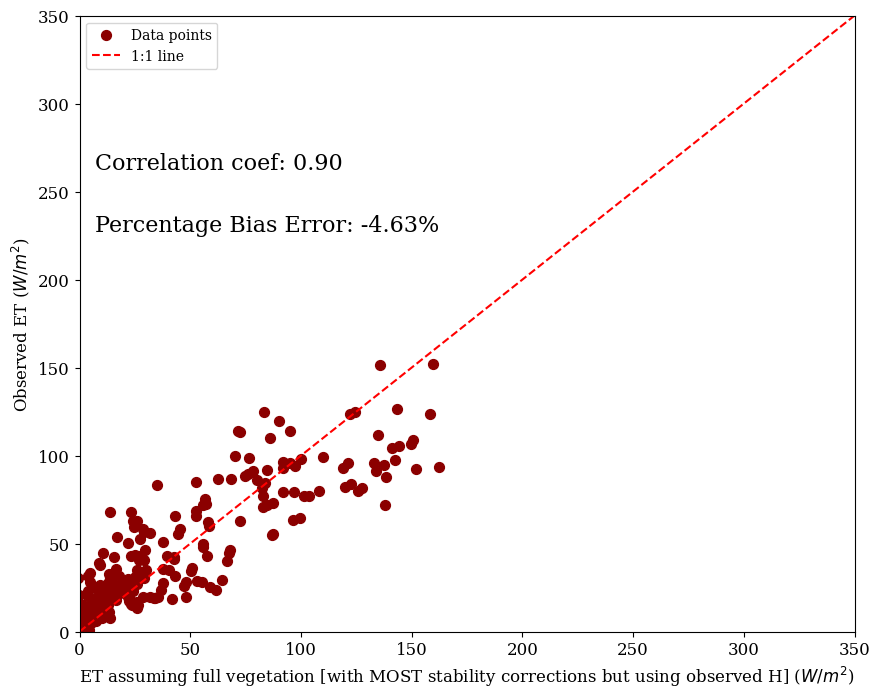

In [74]:
plt.figure(figsize=(10,8))
plt.scatter(LE_pred, lambda_ET_obs, marker='o', s=50, color='darkred', label='Data points')
plt.plot([0, 350], [0, 350], color='red', linestyle='--', label='1:1 line')
plt.xlabel(r"ET assuming full vegetation [with MOST stability corrections but using observed H] ($W/m^2$)", fontsize=12)
plt.ylabel(r"Observed ET ($W/m^2$)", fontsize=12)
plt.xlim(0, 350)
plt.ylim(0, 350)
plt.xticks(size=12)
plt.yticks(size=12)
valid_indices = ~np.isnan(lambda_ET_obs) & ~np.isnan(LE_pred)
lambda_ET_obs_valid= lambda_ET_obs[valid_indices]
LE_pred_valid = LE_pred[valid_indices]
corr = np.corrcoef(lambda_ET_obs_valid, LE_pred_valid)[0, 1]
bias_error = 100 * (np.sum(LE_pred_valid - lambda_ET_obs_valid) / np.sum(lambda_ET_obs_valid))
plt.text(0.02, 0.75, f"Correlation coef: {corr:.2f}", fontsize=16, transform=plt.gca().transAxes)
plt.text(0.02, 0.65, f"Percentage Bias Error: {bias_error:.2f}%", fontsize=16, transform=plt.gca().transAxes)
plt.legend()
plt.show()

## For follow questions and/or any potentital colloboration, please feel free to contact me at ppushpendra@ua.edu